In [2]:
#!pip install pycaret
!pip install shap psutil

  Using cached shap-0.39.0.tar.gz (356 kB)
  Created wheel for shap: filename=shap-0.39.0-cp36-cp36m-linux_x86_64.whl size=481371 sha256=9ef7c95edce8e199a1a800294ca7e222941f318e19ead908d719cffbc5f7acba
  Stored in directory: /home/ec2-user/.cache/pip/wheels/6f/08/25/2992725334291786ea084e06cac493d93049b80e3470318a1b
Successfully built shap
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from pycaret.classification import *

In [25]:
olympics = pd.read_csv("athlete_events.csv")
#is na and invert to see if he/she won a medal
olympics["won_medal"] = pd.isna(olympics["Medal"])
olympics["won_medal"] = ~olympics["won_medal"]


olympics["Year"]=pd.to_datetime(olympics["Year"],format="%Y")


In [26]:
olympics.describe(exclude=[np.number])

,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,won_medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783,271116
unique,134732,2,1184,230,51,35,2,42,66,765,3,2
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,1992-01-01 00:00:00,Summer,London,Athletics,Football Men's Football,Gold,False
freq,58,196594,17847,18853,13821,16413,222552,22426,38624,5733,13372,231333
first,NaN,NaN,NaN,NaN,NaN,1896-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
olympics.describe()

,ID,Age,Height,Weight
count,271116.000000,261642.000000,210945.000000,208241.000000
mean,68248.954396,25.556898,175.338970,70.702393
std,39022.286345,6.393561,10.518462,14.348020
min,1.000000,10.000000,127.000000,25.000000
25%,34643.000000,21.000000,168.000000,60.000000
50%,68205.000000,24.000000,175.000000,70.000000
75%,102097.250000,28.000000,183.000000,79.000000
max,135571.000000,97.000000,226.000000,214.000000


In [29]:
#select required columns
df = olympics[["won_medal","Age","Height","Weight","Year","Sex","NOC","Games","Season","City","Sport","Event"]]
df

,won_medal,Age,Height,Weight,Year,Sex,NOC,Games,Season,City,Sport,Event
0,False,24.0,180.0,80.0,1992-01-01,M,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,False,23.0,170.0,60.0,2012-01-01,M,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight
2,False,24.0,NaN,NaN,1920-01-01,M,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football
3,True,34.0,NaN,NaN,1900-01-01,M,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,False,21.0,185.0,82.0,1988-01-01,F,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,29.0,179.0,89.0,1976-01-01,M,POL,1976 Winter,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles
271112,False,27.0,176.0,59.0,2014-01-01,M,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,False,27.0,176.0,59.0,2014-01-01,M,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,False,30.0,185.0,96.0,1998-01-01,M,POL,1998 Winter,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four


In [37]:

# Enter 1 for classification in the prompt
reg1 = setup(data = df, target = 'won_medal',
             pca=False,
             train_size=0.7,
             feature_interaction=True,
             remove_multicollinearity=True,
             feature_selection=True,
             feature_selection_method = 'boruta',
             #polynomial_features=False,
             session_id=32871,fold_shuffle=True,
             #profile=True,
             high_cardinality_features=['NOC','Event'],
             #high_cardinality_method='clustering',
             #date_features=['Year']
             )

,Description,Value
0,session_id,32871
1,Target,won_medal
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(271116, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,True


In [38]:

ranked=compare_models(sort = 'F1')
ranked

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9058,0.8851,0.4868,0.7888,0.6020,0.5519,0.5727,7.2670
dt,Decision Tree Classifier,0.8683,0.7477,0.5734,0.5480,0.5604,0.4830,0.4831,1.6600
rf,Random Forest Classifier,0.8965,0.8763,0.3969,0.7935,0.5291,0.4781,0.5145,7.8900
knn,K Neighbors Classifier,0.8655,0.7827,0.3624,0.5633,0.4410,0.3686,0.3802,1.3590
nb,Naive Bayes,0.7663,0.6532,0.3231,0.2600,0.2882,0.1503,0.1516,0.0880
lightgbm,Light Gradient Boosting Machine,0.8743,0.8282,0.1690,0.8610,0.2825,0.2463,0.3476,0.7460
lda,Linear Discriminant Analysis,0.8555,0.7144,0.1052,0.5338,0.1757,0.1340,0.1888,1.0900
svm,SVM - Linear Kernel,0.6819,0.0000,0.3212,0.2122,0.1653,0.0480,0.0655,3.5270
ada,Ada Boost Classifier,0.8581,0.7408,0.0652,0.6580,0.1186,0.0947,0.1754,3.7320
gbc,Gradient Boosting Classifier,0.8612,0.7594,0.0613,0.8689,0.1144,0.0970,0.2084,17.9830


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=32871, verbose=0,
                     warm_start=False)

In [39]:
model1 = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9062,0.8857,0.4813,0.7979,0.6004,0.5509,0.5735
1,0.9043,0.8798,0.4761,0.7856,0.5929,0.5423,0.5642
2,0.9055,0.8847,0.4800,0.7931,0.5981,0.5482,0.5704
3,0.9064,0.8851,0.4876,0.7938,0.6041,0.5544,0.5757
4,0.9045,0.8898,0.4883,0.7768,0.5996,0.5486,0.5677
5,0.9052,0.8836,0.4789,0.7908,0.5966,0.5465,0.5686
6,0.9096,0.8857,0.5059,0.8043,0.6212,0.5729,0.5927
7,0.9064,0.8881,0.4959,0.7856,0.6080,0.5579,0.5770
8,0.9043,0.8827,0.4779,0.7844,0.5939,0.5433,0.5648
9,0.9052,0.8856,0.4966,0.7753,0.6054,0.5544,0.5722


In [40]:
model2 = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8703,0.7477,0.5701,0.5558,0.5629,0.4867,0.4868
1,0.8656,0.7453,0.5689,0.5390,0.5536,0.4746,0.4748
2,0.8660,0.7478,0.5765,0.5396,0.5574,0.4785,0.4789
3,0.8713,0.7523,0.5793,0.5583,0.5686,0.4930,0.4931
4,0.8693,0.7508,0.5811,0.5508,0.5656,0.4887,0.4889
5,0.8677,0.7447,0.5668,0.5467,0.5565,0.4788,0.4790
6,0.8700,0.7488,0.5750,0.5539,0.5643,0.4879,0.4880
7,0.8666,0.7496,0.5793,0.5417,0.5599,0.4814,0.4818
8,0.8677,0.7404,0.5574,0.5475,0.5524,0.4748,0.4749
9,0.8681,0.7497,0.5793,0.5469,0.5626,0.4851,0.4853


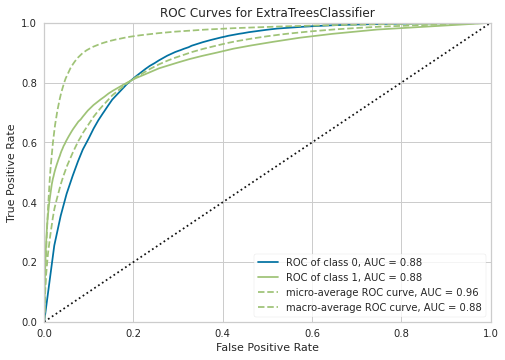

In [52]:
plot_model(model1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


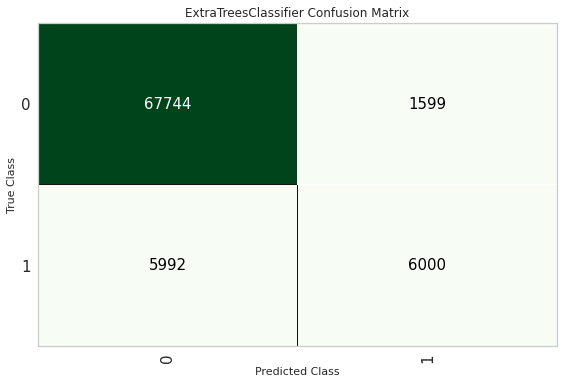

In [53]:
plot_model(model1, plot='confusion_matrix')

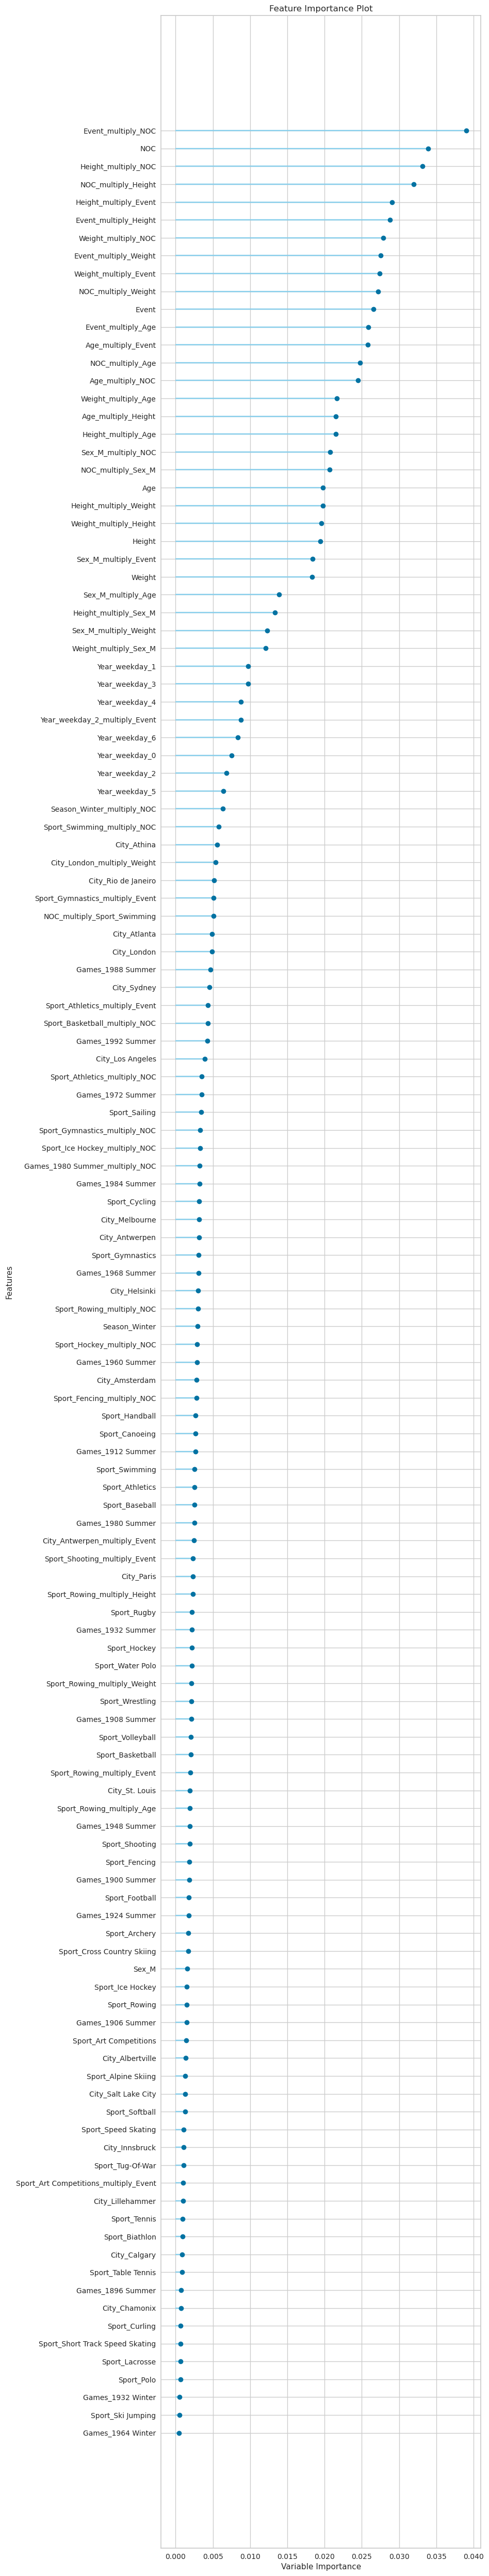

In [41]:
plot_model(model1, plot='feature_all')

In [42]:
blender_specific = blend_models(estimator_list = [model1,model2], method = 'soft')
#not that good than model1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8710,0.8807,0.5701,0.5583,0.5642,0.4884,0.4885
1,0.8666,0.8745,0.5689,0.5426,0.5554,0.4770,0.4772
2,0.8666,0.8786,0.5772,0.5417,0.5589,0.4804,0.4807
3,0.8721,0.8814,0.5801,0.5613,0.5705,0.4954,0.4955
4,0.8698,0.8844,0.5811,0.5527,0.5666,0.4900,0.4902
5,0.8684,0.8787,0.5675,0.5489,0.5580,0.4807,0.4808
6,0.8705,0.8814,0.5743,0.5559,0.5650,0.4889,0.4890
7,0.8675,0.8828,0.5804,0.5447,0.5620,0.4841,0.4844
8,0.8686,0.8768,0.5574,0.5507,0.5540,0.4769,0.4770
9,0.8693,0.8807,0.5786,0.5511,0.5645,0.4877,0.4879


In [43]:
tuned_model = tune_model(model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8535,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [45]:
calibrated_model = calibrate_model(model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9065,0.8918,0.4827,0.7998,0.6021,0.5527,0.5754
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9051,0.8900,0.4746,0.7946,0.5943,0.5444,0.5676
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9072,0.8931,0.4937,0.7944,0.6090,0.5595,0.5799
8,0.9046,0.8882,0.4757,0.7893,0.5936,0.5433,0.5657
9,0.9049,0.8920,0.4977,0.7718,0.6051,0.5539,0.5712


In [46]:
evaluate_model(model1)

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


In [47]:
predict_model(model1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9067,0.8849,0.5003,0.7896,0.6125,0.5625,0.5814


,Age,Height,Weight,NOC,Event,Sex_M,Games_1896 Summer,Games_1900 Summer,Games_1906 Summer,Games_1908 Summer,...,Sport_Fencing_multiply_NOC,Sex_M_multiply_Age,Sex_M_multiply_Event,Weight_multiply_Age,Age_multiply_Event,NOC_multiply_Height,Height_multiply_NOC,won_medal,Label,Score
0,24.000000,175.330093,70.707428,8900.0,569.0,0.0,0.0,0.0,0.0,0.0,...,8900.0,0.000000,0.0,1696.978271,13656.000000,1.560438e+06,1.560438e+06,False,False,0.96
1,25.541059,180.000000,70.707428,6852.0,724.0,1.0,0.0,0.0,0.0,0.0,...,0.0,25.541059,724.0,1805.942627,18491.726562,1.233360e+06,1.233360e+06,False,False,0.97
2,30.000000,179.000000,66.000000,4056.0,193.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,1980.000000,5790.000000,7.260240e+05,7.260240e+05,False,False,0.94
3,23.000000,163.000000,57.000000,13197.0,214.0,1.0,0.0,0.0,0.0,0.0,...,0.0,23.000000,214.0,1311.000000,4922.000000,2.151111e+06,2.151111e+06,True,False,0.80
4,20.000000,175.330093,70.707428,3631.0,638.0,1.0,0.0,0.0,0.0,0.0,...,0.0,20.000000,638.0,1414.148560,12760.000000,6.366236e+05,6.366236e+05,False,False,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81330,39.000000,188.000000,107.000000,1311.0,1197.0,1.0,0.0,0.0,0.0,0.0,...,0.0,39.000000,1197.0,4173.000000,46683.000000,2.464680e+05,2.464680e+05,False,False,0.93
81331,26.000000,190.000000,93.000000,6852.0,2333.0,1.0,0.0,0.0,0.0,0.0,...,0.0,26.000000,2333.0,2418.000000,60658.000000,1.301880e+06,1.301880e+06,False,False,0.96
81332,28.000000,192.000000,84.000000,3717.0,442.0,1.0,0.0,0.0,0.0,0.0,...,0.0,28.000000,442.0,2352.000000,12376.000000,7.136640e+05,7.136640e+05,False,False,0.96
81333,24.000000,176.000000,65.000000,5963.0,360.0,1.0,0.0,0.0,0.0,0.0,...,0.0,24.000000,360.0,1560.000000,8640.000000,1.049488e+06,1.049488e+06,False,False,0.89


In [48]:
final_model = finalize_model(model1)
predection=predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9979,1.0000,0.9877,0.9984,0.9930,0.9918,0.9918


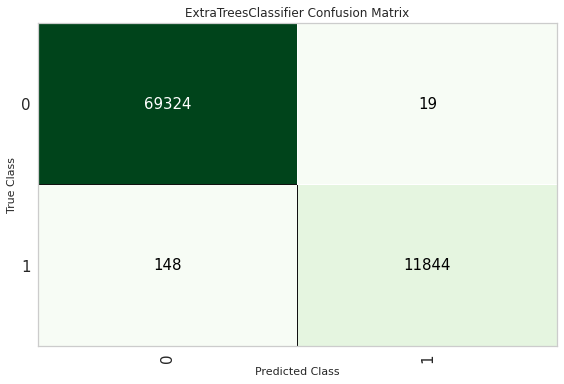

In [54]:
plot_model(final_model,plot='confusion_matrix')

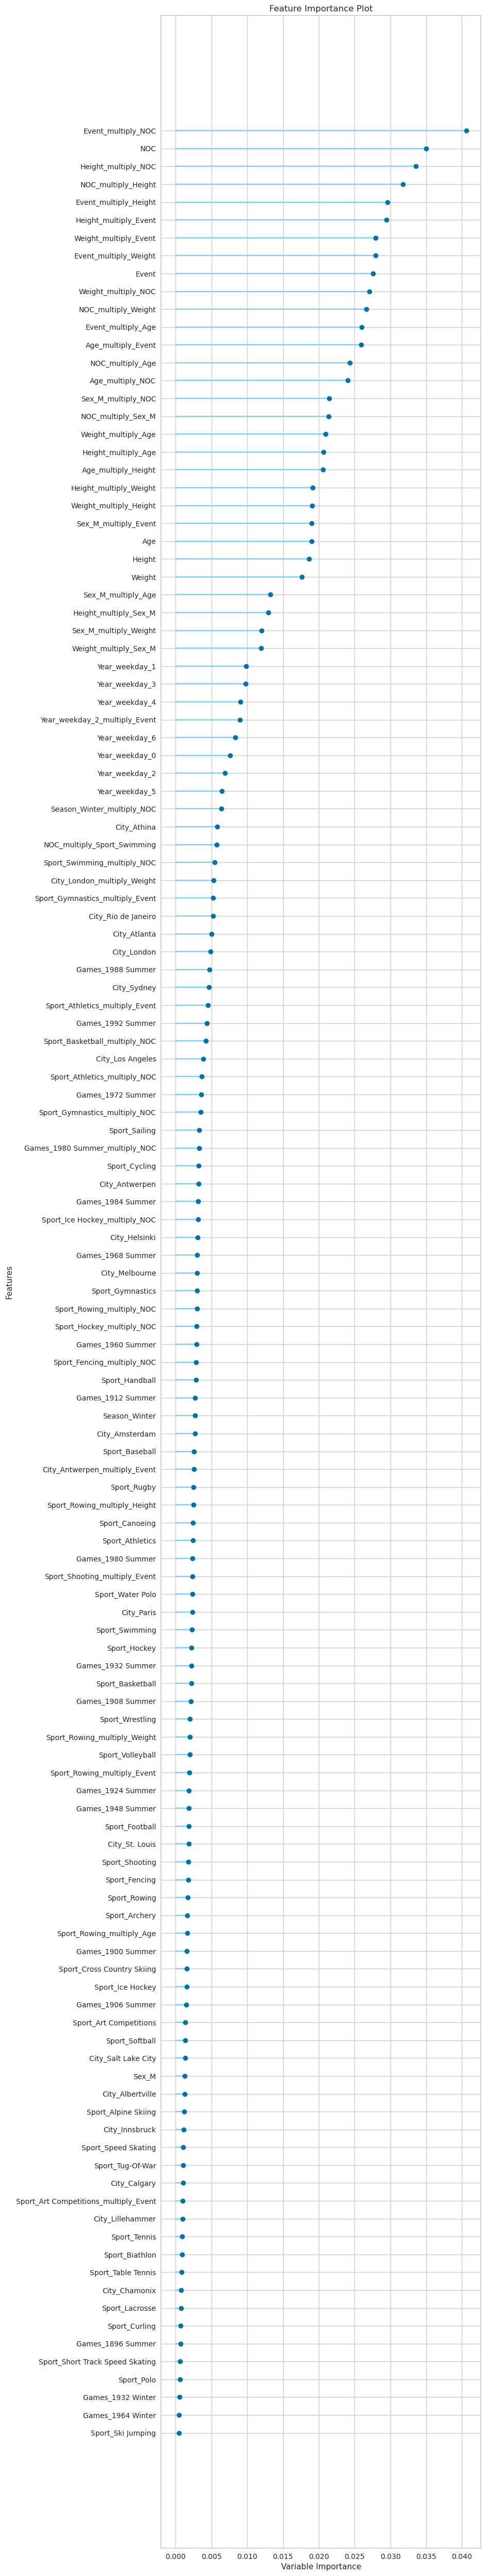

In [58]:
plot_model(final_model,plot='feature_all')